In [24]:
import xml.etree.ElementTree as ET
import random
from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [25]:
class Product:
    def __init__(self, name, count=None):
        self.name = name
        if count is not None:
            self.count = count
        else:
            # Генерация данных с использованием нормального распределения
            min_rand = random.randint(250, 500)  # Минимальное значение среднего
            delt_rand = 100  # Стандартное отклонение
            self.count = np.random.normal(min_rand, delt_rand, 12)
            self.count = np.round(self.count, 0)  # Округляем до целых чисел
    
    def to_dict(self):
        return {self.name: self.count.tolist()}  # Преобразуем numpy array в список
    
    def sum(self):
        return sum(self.count)
    
    def avg(self):
        return round(sum(self.count) / len(self.count), 0)
    
    def msd(self):
        avg = self.avg()
        upper_value = sum([(v - avg) ** 2 for v in self.count])
        msd_square = upper_value / (len(self.count) - 1)
        return round(msd_square ** 0.5, 0)

In [26]:
def parse_xml(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()
    shop = root.find('shop')
    offers = shop.find('offers').findall('offer')

    models = []
    for offer in offers:
        model_name = offer.find('name').text
        print(model_name)
        models.append(Product(name=model_name))

    return models

xml_file = 'offers.xml'
models = parse_xml(xml_file)
models

Куртка зимняя Tundra Pro
Брюки летние LightBreeze
Футболка Basic Cotton
Ветровка CityWind
Платье Elegant Night


In [27]:
def list_to_df(models):
    result = {}
    for m in models:
        result[m.name] = m.count
    df = pd.DataFrame(result).T
    return df

sales_df = list_to_df(models)
sales_df

,0,1,2,3,4,5,6,7,8,9,10,11
Куртка зимняя Tundra Pro,401.0,330.0,184.0,372.0,371.0,301.0,278.0,312.0,293.0,281.0,340.0,454.0
Брюки летние LightBreeze,465.0,396.0,103.0,400.0,235.0,345.0,318.0,326.0,351.0,248.0,472.0,403.0
Футболка Basic Cotton,340.0,286.0,287.0,201.0,423.0,291.0,206.0,569.0,286.0,457.0,330.0,291.0
Ветровка CityWind,213.0,282.0,210.0,513.0,421.0,160.0,277.0,367.0,403.0,412.0,374.0,356.0
Платье Elegant Night,200.0,527.0,324.0,478.0,593.0,434.0,641.0,540.0,317.0,483.0,492.0,404.0


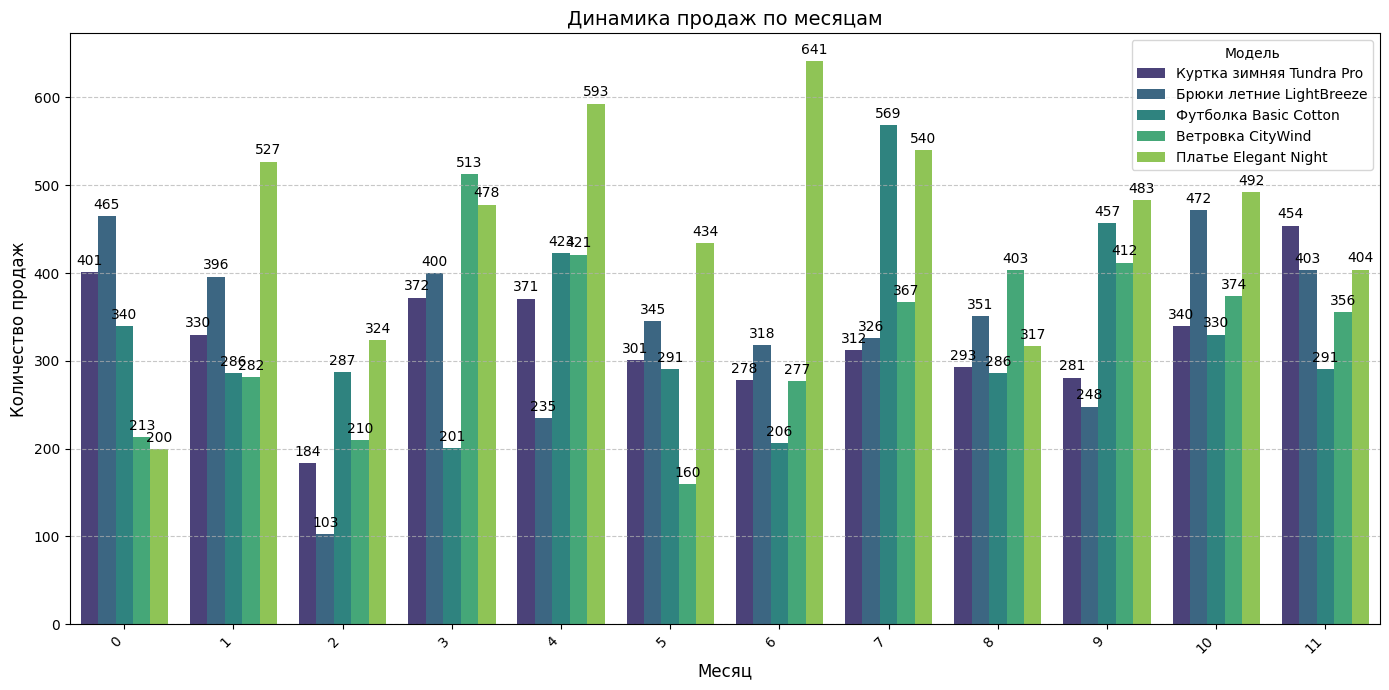


Таблица продаж:


,0,1,2,3,4,5,6,7,8,9,10,11
Куртка зимняя Tundra Pro,401.0,330.0,184.0,372.0,371.0,301.0,278.0,312.0,293.0,281.0,340.0,454.0
Брюки летние LightBreeze,465.0,396.0,103.0,400.0,235.0,345.0,318.0,326.0,351.0,248.0,472.0,403.0
Футболка Basic Cotton,340.0,286.0,287.0,201.0,423.0,291.0,206.0,569.0,286.0,457.0,330.0,291.0
Ветровка CityWind,213.0,282.0,210.0,513.0,421.0,160.0,277.0,367.0,403.0,412.0,374.0,356.0
Платье Elegant Night,200.0,527.0,324.0,478.0,593.0,434.0,641.0,540.0,317.0,483.0,492.0,404.0


In [28]:
def visualize_sales(data):
    # Преобразование в длинный формат
    df_long = data.reset_index().melt(
        id_vars='index',
        var_name='Месяц',
        value_name='Продажи'
    ).rename(columns={'index': 'Модель'})

    # Настройка визуализации
    plt.figure(figsize=(14, 7))
    ax = sns.barplot(
        data=df_long,
        x='Месяц',
        y='Продажи',
        hue='Модель',
        palette='viridis',
        errorbar=None
    )

    # Форматирование
    plt.title('Динамика продаж по месяцам', fontsize=14)
    plt.xlabel('Месяц', fontsize=12)
    plt.ylabel('Количество продаж', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Добавление подписей
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', padding=3)

    plt.show()
    print("\nТаблица продаж:")
    return data

visualize_sales(sales_df)

In [29]:
p0 = [model.avg() for model in models] # средние значения
[f'{p.name}: {p_avg}' for p_avg, p in zip(p0, models)]

['Куртка зимняя Tundra Pro: 326.0',
 'Брюки летние LightBreeze: 338.0',
 'Футболка Basic Cotton: 331.0',
 'Ветровка CityWind: 332.0',
 'Платье Elegant Night: 453.0']

In [30]:
# средневадратичное отклонение
msd_products = [model.msd() for model in models]
[f'{model.name}: {msd_value}' for msd_value, model in zip(msd_products, models)]

['Куртка зимняя Tundra Pro: 69.0',
 'Брюки летние LightBreeze: 105.0',
 'Футболка Basic Cotton: 106.0',
 'Ветровка CityWind: 104.0',
 'Платье Elegant Night: 125.0']

In [31]:
predict_values = np.round(p0 + np.random.normal(0, msd_products, len(msd_products)), 1)
predict_values

array([356.4, 479.9, 426.2, 463.3, 536.9])

In [32]:
for product, predict_value in zip(models, predict_values):
    product.count = np.append(product.count, predict_value)

models

In [33]:
sales_df = list_to_df(models)
sales_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
Куртка зимняя Tundra Pro,401.0,330.0,184.0,372.0,371.0,301.0,278.0,312.0,293.0,281.0,340.0,454.0,356.4
Брюки летние LightBreeze,465.0,396.0,103.0,400.0,235.0,345.0,318.0,326.0,351.0,248.0,472.0,403.0,479.9
Футболка Basic Cotton,340.0,286.0,287.0,201.0,423.0,291.0,206.0,569.0,286.0,457.0,330.0,291.0,426.2
Ветровка CityWind,213.0,282.0,210.0,513.0,421.0,160.0,277.0,367.0,403.0,412.0,374.0,356.0,463.3
Платье Elegant Night,200.0,527.0,324.0,478.0,593.0,434.0,641.0,540.0,317.0,483.0,492.0,404.0,536.9


In [34]:
p0_np = np.array(p0)
msd_np = np.array(msd_products)
condition_one = sales_df.T - p0_np < (2 * msd_np)
condition_one.all()

Куртка зимняя Tundra Pro     True
Брюки летние LightBreeze     True
Футболка Basic Cotton       False
Ветровка CityWind            True
Платье Elegant Night         True
dtype: bool

In [35]:
condition_two = p0_np > (2 * msd_np)
condition_two

array([ True,  True,  True,  True,  True])

In [36]:
condition_three = sales_df > 0
condition_three

,0,1,2,3,4,5,6,7,8,9,10,11,12
Куртка зимняя Tundra Pro,True,True,True,True,True,True,True,True,True,True,True,True,True
Брюки летние LightBreeze,True,True,True,True,True,True,True,True,True,True,True,True,True
Футболка Basic Cotton,True,True,True,True,True,True,True,True,True,True,True,True,True
Ветровка CityWind,True,True,True,True,True,True,True,True,True,True,True,True,True
Платье Elegant Night,True,True,True,True,True,True,True,True,True,True,True,True,True


In [37]:
def get_color_by_condition(c1, c2, c3):
    if c1 and c2 and c3:
        return "Зеленый"
    elif (not c1 and c2 and c3) or (c1 and not c2 and c3):
        return "Желтый"
    elif not c1 and not c2 and c3:
        return "Оранжевый"
    else:
        return "Красный"

table_header = ["Товар", "Уровень достоверности", "Условие 1", "Условие 2", "Условие 3"]

table_data = []

condition_one_result = condition_one.all()
condition_two_result = condition_two
condition_three_result = condition_three.all()

for i in range(len(models)):
    table_data.append({
        "Товар": models[i].name,
        "Уровень достоверности": get_color_by_condition(condition_one_result[i], condition_two_result[i], condition_three_result[i]),
        "Условие 1": condition_one_result[i],
        "Условие 2": condition_two_result[i],
        "Условие 3": condition_three_result[i]
    })

table = pd.DataFrame(table_data, columns=table_header)

def color_rows_by_reliability(val):
    if val == "Зеленый":
        return 'background-color: green'
    elif val == "Желтый":
        return 'background-color: yellow'
    elif val == "Оранжевый":
        return 'background-color: orange'
    elif val == "Красный":
        return 'background-color: red'
    else:
        return ''

table_style = table["Уровень достоверности"].to_frame().applymap(lambda x: color_rows_by_reliability(x))
styled_table = table.style.apply(lambda x: table_style, axis=None)
styled_table

,Товар,Уровень достоверности,Условие 1,Условие 2,Условие 3
0,Куртка зимняя Tundra Pro,Зеленый,True,True,True
1,Брюки летние LightBreeze,Зеленый,True,True,True
2,Футболка Basic Cotton,Желтый,False,True,True
3,Ветровка CityWind,Зеленый,True,True,True
4,Платье Elegant Night,Зеленый,True,True,True
